# 基础数据统计分析

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_parquet('data/local_data_structure/CL1_output.parquet')
data_charge  = data[data['charge_status']==1]
data_charge

vehicle_speed  vehicle_status  charge_status   mileage  \
2022-03-27 19:37:38            0.0             2.0            1.0   97599.8   
2022-03-27 19:37:58            0.0             2.0            1.0   97599.8   
2022-03-27 19:38:18            0.0             2.0            1.0   97599.8   
2022-03-27 19:38:38            0.0             2.0            1.0   97599.8   
2022-03-27 19:38:58            0.0             2.0            1.0   97599.8   
...                            ...             ...            ...       ...   
2022-12-13 02:10:48            0.0             2.0            1.0  151384.1   
2022-12-13 02:11:08            0.0             2.0            1.0  151384.1   
2022-12-13 02:11:28            0.0             2.0            1.0  151384.1   
2022-12-13 02:11:48            0.0             2.0            1.0  151384.1   
2022-12-13 02:12:08            0.0             2.0            1.0  151384.1   

                     total_voltage  total_current   soc  \
2022-03-27 19:37:38          329.8         -111.4  23.0   
2022-03-27 19:37:58          331.0         -111.0  24.0   
2022-03-27 19:38:18          331.8         -111.4  24.0   
2022-03-27 19:38:38          332.3         -110.7  25.0   
2022-03-27 19:38:58          332.8         -110.9  25.0   
...                            ...            ...   ...   
2022-12-13 02:10:48          375.2          -43.7  94.0   
2022-12-13 02:11:08          375.7          -43.7  94.0   
2022-12-13 02:11:28          375.7          -44.0  94.0   
2022-12-13 02:11:48          375.9          -44.0  94.0   
2022-12-13 02:12:08          376.2          -43.4  95.0   

                     max_single_cell_voltage  min_single_cell_voltage  \
2022-03-27 19:37:38                    3.669                    3.645   
2022-03-27 19:37:58                    3.682                    3.656   
2022-03-27 19:38:18                    3.691                    3.665   
2022-03-27 19:38:38                    3.697                    3.671   
2022-03-27 19:38:58                    3.700                    3.677   
...                                      ...                      ...   
2022-12-13 02:10:48                    4.181                    4.127   
2022-12-13 02:11:08                    4.183                    4.129   
2022-12-13 02:11:28                    4.186                    4.131   
2022-12-13 02:11:48                    4.187                    4.133   
2022-12-13 02:12:08                    4.190                    4.135   

                     max_temperature  ...  drive_motor_controller_temperature  \
2022-03-27 19:37:38             23.0  ...                                42.0   
2022-03-27 19:37:58             23.0  ...                                42.0   
2022-03-27 19:38:18             23.0  ...                                42.0   
2022-03-27 19:38:38             23.0  ...                                42.0   
2022-03-27 19:38:58             23.0  ...                                42.0   
...                              ...  ...                                 ...   
2022-12-13 02:10:48             35.0  ...                                37.0   
2022-12-13 02:11:08             35.0  ...                                37.0   
2022-12-13 02:11:28             35.0  ...                                37.0   
2022-12-13 02:11:48             35.0  ...                                37.0   
2022-12-13 02:12:08             35.0  ...                                37.0   

                     drive_motor_speed  drive_motor_torque  \
2022-03-27 19:37:38                0.0                 0.0   
2022-03-27 19:37:58                0.0                 0.0   
2022-03-27 19:38:18                0.0                 0.0   
2022-03-27 19:38:38                0.0                 0.0   
2022-03-27 19:38:58                0.0                 0.0   
...                                ...                 ...   
2022-12-13 02:10:48               -2.0               -13.7   
2022-12-13 02:11:

In [2]:
data.columns

Index(['vehicle_speed', 'vehicle_status', 'charge_status', 'mileage',
       'total_voltage', 'total_current', 'soc', 'max_single_cell_voltage',
       'min_single_cell_voltage', 'max_temperature', 'min_temperature',
       'drive_motor_controller_temperature', 'drive_motor_speed',
       'drive_motor_torque', 'drive_motor_temperature',
       'motor_controller_input_voltage', 'motor_controller_dc_bus_current',
       'rechargeable_energy_storage_device_current', 'cycle_flag',
       'begin_charge_flag', 'charge_energy'],
      dtype='object')

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
def analyze_distribution(data):
    """ 分析所有列的分布 """
    num_of_columns = len(data.columns)
    num_of_rows = num_of_columns // 4 if num_of_columns % 4 == 0 else num_of_columns // 4 + 1

    # 设置风格
    sns.set_style("whitegrid")

    fig, axs = plt.subplots(num_of_rows, 4, figsize=(20, num_of_rows*5))

    for i, column_name in enumerate(data.columns):
        row = i // 4
        col = i % 4

        # 绘制直方图和核密度估计
        sns.distplot(data[column_name], bins=50, ax=axs[row, col], kde_kws={"color": "r", "lw": 1.5, "alpha":0.8})
        axs[row, col].set_title(f"Distribution: {column_name}")
        axs[row, col].set_xlabel(column_name)
        axs[row, col].set_ylabel("Frequency")

    plt.tight_layout()
    plt.show()

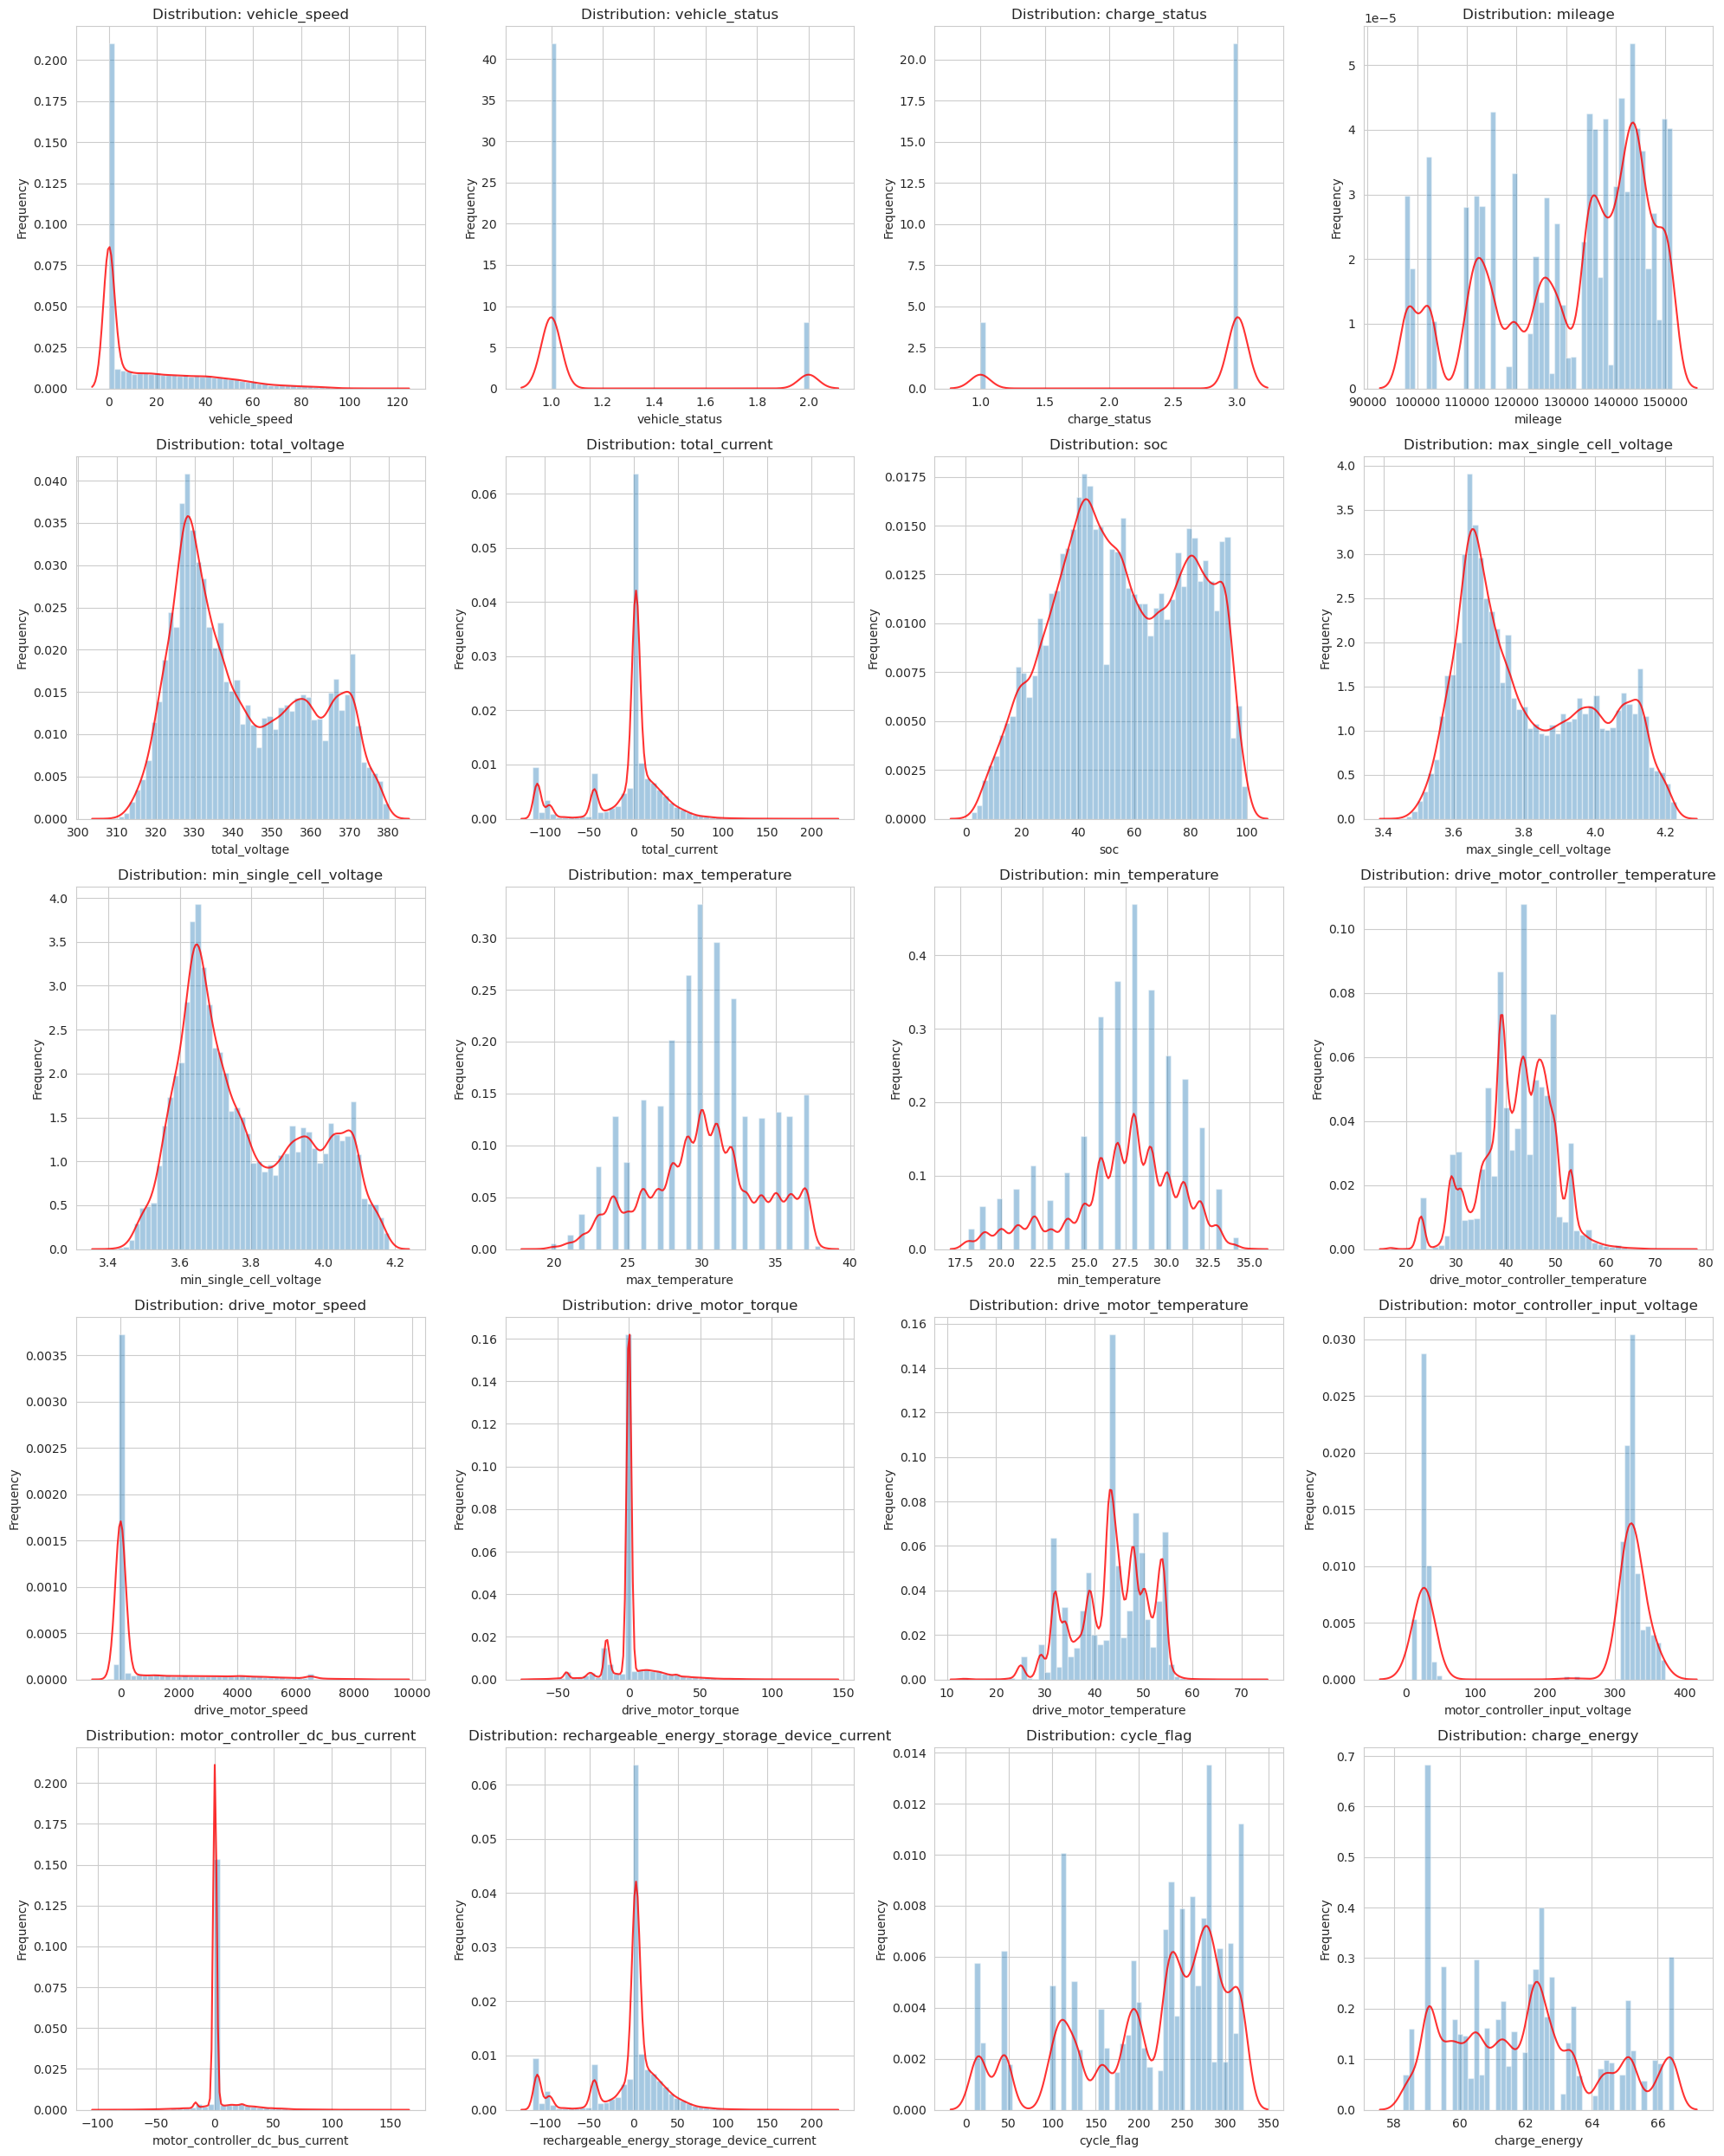

In [4]:
analyze_distribution(data.drop(['begin_charge_flag'], axis=1))

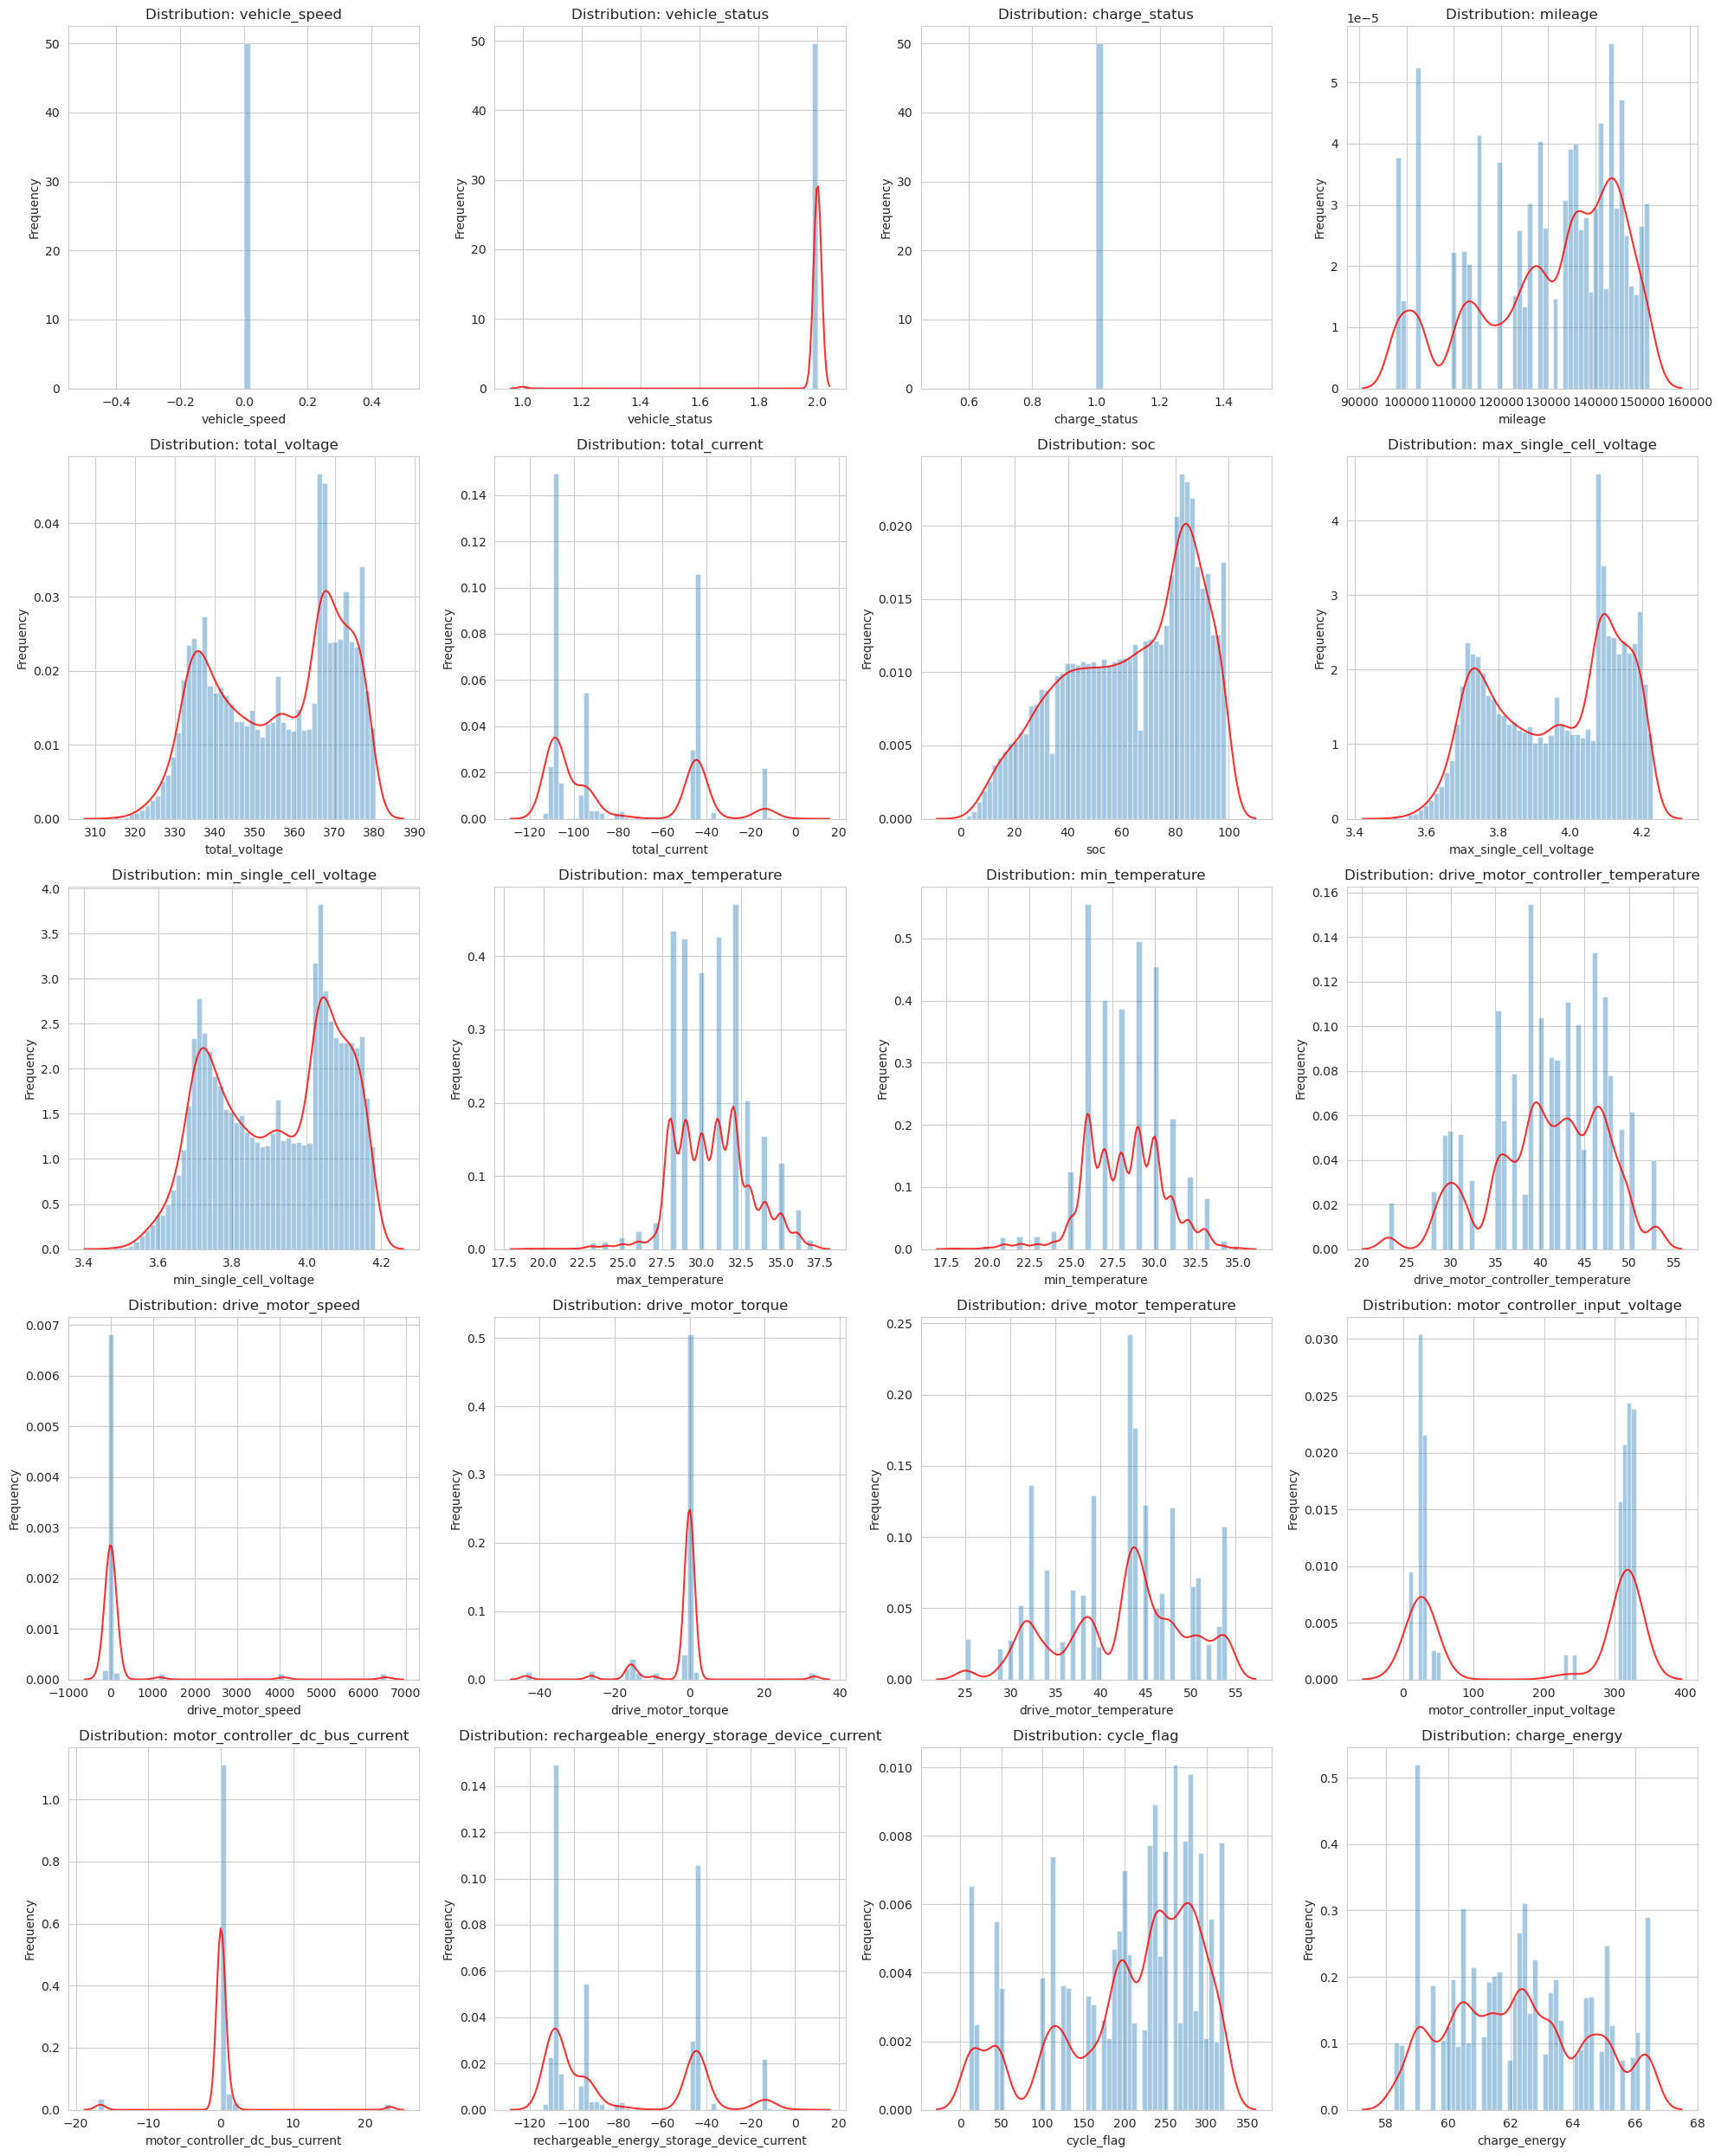

In [5]:
analyze_distribution(data_charge.drop(['begin_charge_flag'], axis=1))

In [6]:
## 读入

## 读入所有数据

In [7]:
import os

def merge_files_in_directory(directory, file_type):
    files = [f for f in os.listdir(directory) if f.endswith(file_type)]
    df_list = []
    for f in files:
        df = pd.read_parquet(os.path.join(directory, f))
        car_name = f.split("_")[0]  # 提取车名
        df['car'] = car_name  # 添加新的列，用车名填充
        df_list.append(df)
    merged_df = pd.concat(df_list, ignore_index=True)
    return merged_df

# 读取文件夹下所有parquet文件
directory = 'data/local_data_structure'
file_type = '.parquet'
merged_df = merge_files_in_directory(directory, file_type)
print(merged_df.shape)

(7875459, 22)


In [8]:
merged_df.index

RangeIndex(start=0, stop=7875459, step=1)

# 分析充电容量与行驶里程间的关系

In [9]:
energy_data = merged_df[merged_df['begin_charge_flag']==1]
energy_data.shape

(4758, 22)

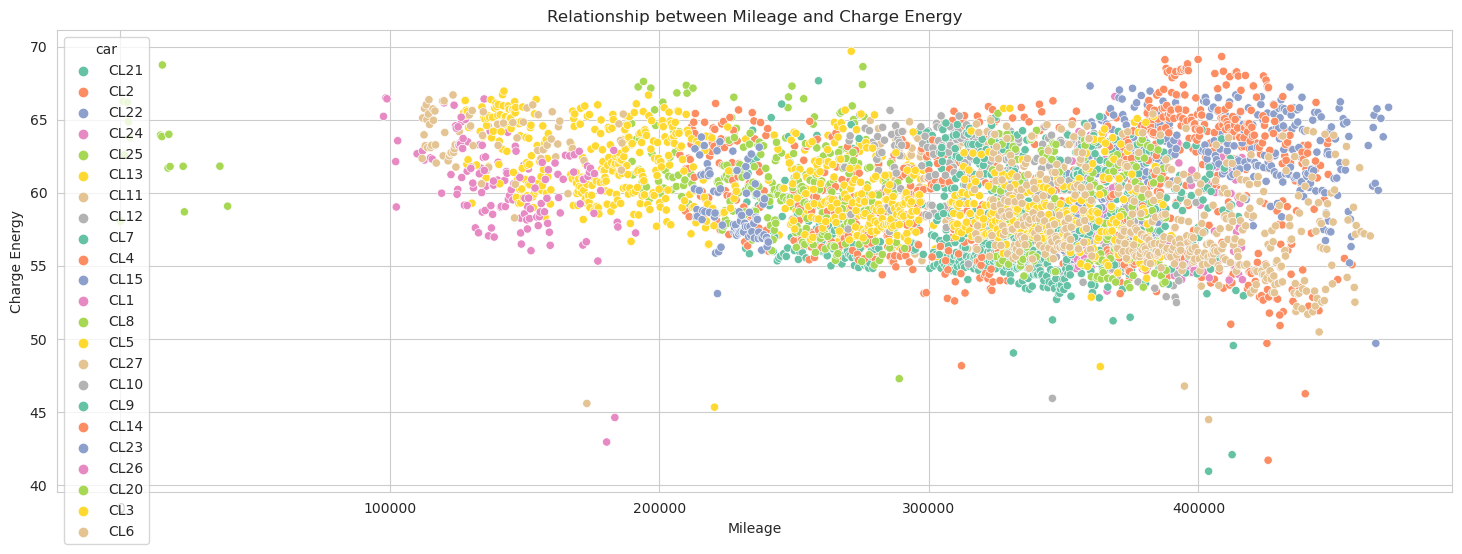

In [10]:

# 设置图像风格
sns.set_style("whitegrid")

# 创建一个新的图像
plt.figure(figsize=(18, 6))

# 绘制散点图
sns.scatterplot(data=energy_data, x="mileage", y="charge_energy", hue="car", palette="Set2")

# 设置标题和标签
plt.title("Relationship between Mileage and Charge Energy")
plt.xlabel("Mileage")
plt.ylabel("Charge Energy")

# 显示图像
plt.show()

## 离群值筛选

清洗的数据比例： 0.9461958806221101


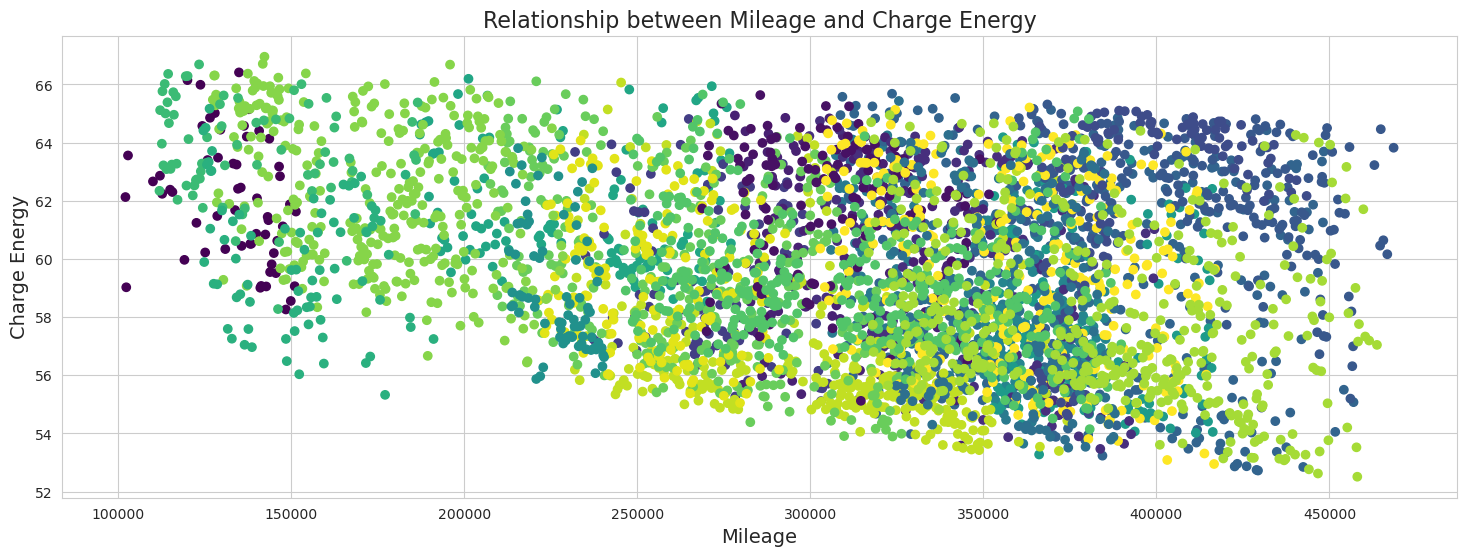

In [11]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder

# 设置图像风格
sns.set_style("whitegrid")

# 剔除里程异常值
orin_data = merged_df[merged_df['begin_charge_flag']==1]
energy_data = orin_data[orin_data['mileage']>100000]

# 计算线性回归线
model = LinearRegression()
model.fit(energy_data[['mileage']], energy_data['charge_energy'])
energy_data['predicted_charge_energy'] = model.predict(energy_data[['mileage']])

# 计算每个数据点与线性回归线的距离
energy_data['residual'] = abs(energy_data['charge_energy'] - energy_data['predicted_charge_energy'])

# 定义离群值的阈值
threshold = energy_data['residual'].quantile(0.95)

# 去除离群值
energy_data = energy_data[energy_data['residual'] <= threshold]

# 创建一个新的图像
fig, ax = plt.subplots(figsize=(18, 6))

# 将汽车名称转换为数字
le = LabelEncoder()
energy_data['car_encoded'] = le.fit_transform(energy_data['car'])

# 绘制散点图
scatter = ax.scatter(data=energy_data, x="mileage", y="charge_energy", c="car_encoded", cmap="viridis")

# 设置标题和标签
ax.set_title("Relationship between Mileage and Charge Energy", fontsize=16)
ax.set_xlabel("Mileage", fontsize=14)
ax.set_ylabel("Charge Energy", fontsize=14)

# 添加颜色条
# cbar = fig.colorbar(scatter, ax=ax, orientation='horizontal', fraction=0.03, ticks=[], anchor=(1, 1), panchor=(1, 1))
# cbar.set_label("Different EVs", fontsize=14, fontweight='bold')

print('清洗的数据比例：',energy_data.shape[0]/orin_data.shape[0])

# 显示图像
plt.show()

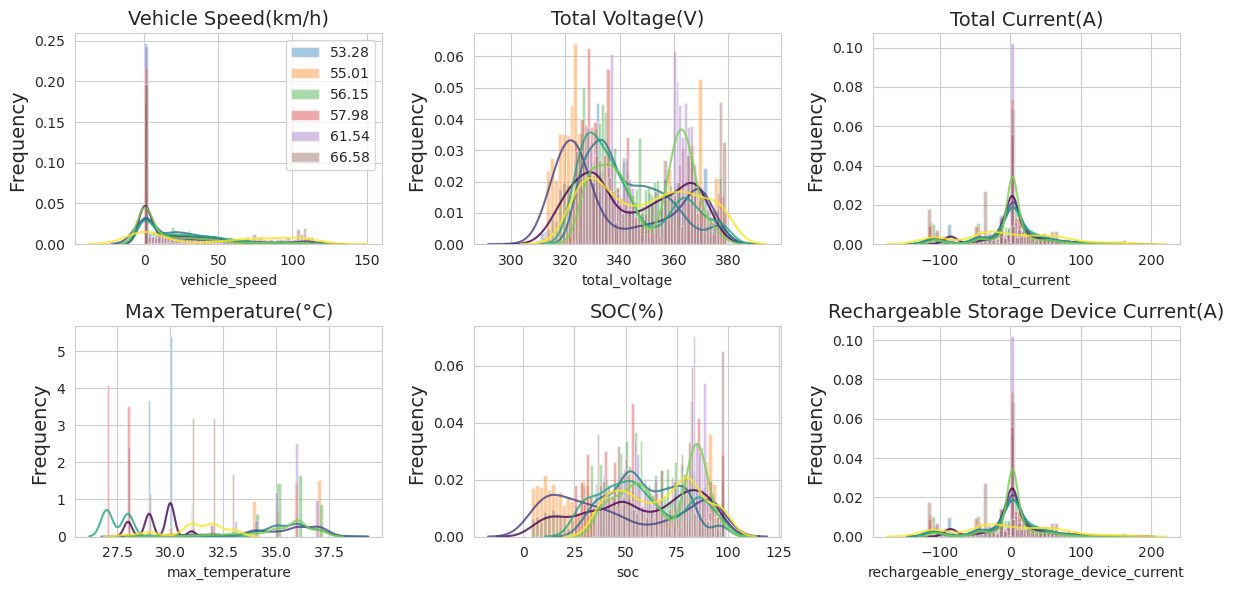

In [88]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.cm as cm
def analyze_distribution(datas, labels, new_column_names, units):
    """ 分析所有列的分布 """
    num_of_columns = len(datas[0].columns)
    num_of_rows = num_of_columns // 3 if num_of_columns % 3 == 0 else num_of_columns // 3 + 1

    # 设置风格
    sns.set_style("whitegrid")

    fig, axs = plt.subplots(num_of_rows, 3, figsize=(12, num_of_rows*3))

    # 创建一个颜色映射
    cmap = cm.get_cmap('viridis', len(datas))

    for i, column_name in enumerate(datas[0].columns):
        row = i // 3
        col = i % 3

        for j, data in enumerate(datas):
            # 清理 NaN 和无限大的值
            clean_data = data[column_name].replace([np.inf, -np.inf], np.nan).dropna()
            
            # 绘制直方图和核密度估计，不显示x轴标签
            sns.distplot(clean_data, bins=50, ax=axs[row, col], kde_kws={"lw": 1.5, "alpha":0.8, "color": cmap(j)}, label=round(labels[j], 2))
            # axs[row, col].set_xlabel('')

        # 使用新的列名和单位
        column_name = new_column_names[i]
        unit = units[i]

        axs[row, col].set_title(f"{column_name}({unit})",fontsize=14)
        axs[row, col].set_ylabel(f"Frequency ",fontsize=14)
        if i == 0:
            axs[row, col].legend()

    # 添加颜色条
    # fig.colorbar(cm.ScalarMappable(cmap=cmap), ax=axs.ravel().tolist())

    plt.tight_layout()
    plt.show()

df_1 = merged_df[merged_df['car'] == 'CL24']
#从原始数据中均匀提取N个充电电量
energy_list = df_1['charge_energy'].unique()
energy_list = sorted(energy_list)
energy_list = energy_list[::int(len(energy_list)/5)]

#目标列名
column_target = ['vehicle_speed','total_voltage','total_current', 'max_temperature','soc','rechargeable_energy_storage_device_current']

#新的列名
new_column_names = ['Vehicle Speed', 'Total Voltage', 'Total Current', 'Max Temperature', 'SOC','Rechargeable Storage Device Current']

#对应的单位
units = ['km/h', 'V', 'A', '°C', '%' ,'A']

df_list = []
label_list = []
for energy in energy_list:
    df_list.append(df_1[df_1['charge_energy'] == energy][column_target])
    label_list.append(energy)

analyze_distribution(df_list, label_list, new_column_names, units)

In [36]:
df_1.columns

Index(['vehicle_speed', 'vehicle_status', 'charge_status', 'mileage',
       'total_voltage', 'total_current', 'soc', 'max_single_cell_voltage',
       'min_single_cell_voltage', 'max_temperature', 'min_temperature',
       'drive_motor_controller_temperature', 'drive_motor_speed',
       'drive_motor_torque', 'drive_motor_temperature',
       'motor_controller_input_voltage', 'motor_controller_dc_bus_current',
       'rechargeable_energy_storage_device_current', 'cycle_flag',
       'begin_charge_flag', 'charge_energy'],
      dtype='object')

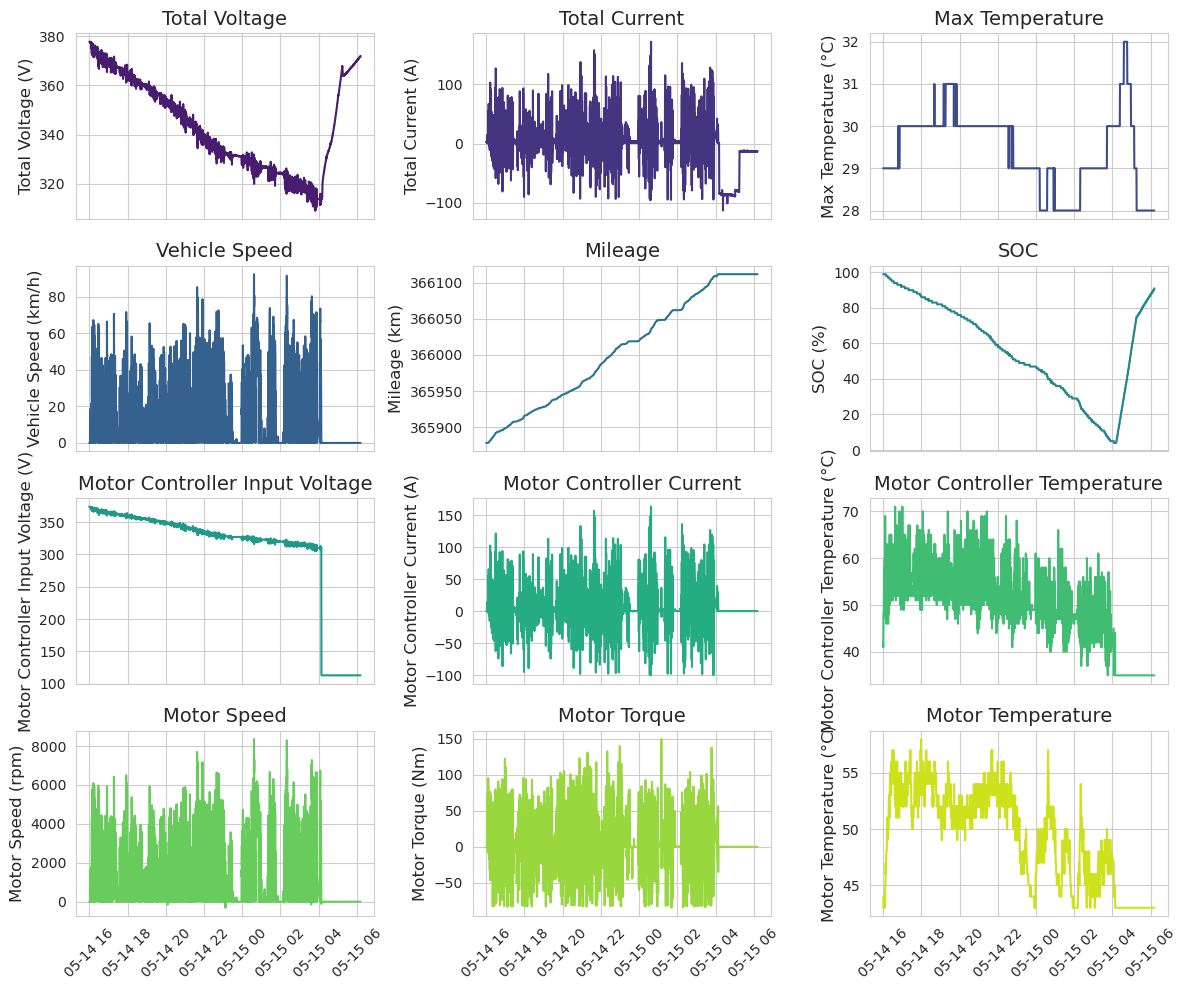

In [92]:
import matplotlib.cm as cm
import seaborn as sns
import matplotlib.pyplot as plt

def analyze_line(data, units, new_column_names):
    """ 分析所有列的分布 """
    num_of_columns = len(data.columns)
    num_of_rows = 4
    num_of_cols = 3

    # 设置风格
    sns.set_style("whitegrid")
    fig, axs = plt.subplots(num_of_rows, num_of_cols, figsize=(12, num_of_rows*2.5), sharex='col')

    # 创建一个颜色映射
    colors = sns.color_palette("viridis", num_of_columns)

    for i, column_name in enumerate(data.columns):
        row = i // num_of_cols
        col = i % num_of_cols

        # 清理 NaN 和无限大的值
        clean_data = data[column_name].replace([np.inf, -np.inf], np.nan).dropna()
        # 绘制原始信号图
        axs[row, col].plot(clean_data.index, clean_data, color=colors[i])

        # 使用新的列名
        column_name = new_column_names[i]

        axs[row, col].set_title(column_name, fontsize=14)
        axs[row, col].set_ylabel(f"{column_name} ({units[i]})", fontsize=12)

        # 设置横坐标标签倾斜45度
        for label in axs[row, col].get_xticklabels():
            label.set_rotation(45)

    # 调整子图间距
    plt.subplots_adjust(hspace=0.4, wspace=0.3)

    plt.tight_layout()
    plt.show()
    
df_1 = pd.read_parquet('data/local_data_structure/CL24_output.parquet')
#从原始数据中均匀提取N个充电电量
energy_selected = energy_list[0]

#目标列名
column_target = ['total_voltage','total_current','max_temperature',
                 'vehicle_speed','mileage','soc',
                 'motor_controller_input_voltage', 'motor_controller_dc_bus_current','drive_motor_controller_temperature'
                 , 'drive_motor_speed', 'drive_motor_torque', 'drive_motor_temperature']

#新的列名
new_column_names = ['Total Voltage', 'Total Current', 'Max Temperature',
                    'Vehicle Speed', 'Mileage', 'SOC',
                    'Motor Controller Input Voltage', 'Motor Controller Current', 'Motor Controller Temperature',
                    'Motor Speed', 'Motor Torque', 'Motor Temperature']

#对应的单位
units = ['V', 'A', '°C', 'km/h', 'km', '%', 'V', 'A', '°C', 'rpm', 'Nm', '°C']

line_data = df_1[df_1['charge_energy'] == energy_selected][column_target]

analyze_line(line_data, units, new_column_names)

In [26]:
energy_list

[58.26388888888889,
 60.224444444444444,
 61.478888888888896,
 62.84444444444445,
 64.57444444444444,
 66.48333333333333]

## 极端案例可视化分析

In [15]:
merged_df[(merged_df['car'] == 'CL26')]

vehicle_speed  vehicle_status  charge_status   mileage  \
6053659            0.0             1.0            3.0  124447.2   
6053660            0.0             1.0            3.0  124447.2   
6053661            0.0             1.0            3.0  124447.2   
6053662            0.0             1.0            3.0  124447.2   
6053663            0.0             1.0            3.0  124447.2   
...                ...             ...            ...       ...   
6178969            0.0             2.0            1.0  191151.7   
6178970            0.0             2.0            1.0  191151.7   
6178971            0.0             2.0            1.0  191151.7   
6178972            0.0             2.0            1.0  191151.7   
6178973            0.0             2.0            1.0  191151.7   

         total_voltage  total_current    soc  max_single_cell_voltage  \
6053659          377.7            0.8  100.0                    4.217   
6053660          377.7            0.8  100.0                    4.216   
6053661          377.7            0.7  100.0                    4.217   
6053662          377.7            0.7  100.0                    4.216   
6053663          377.7            0.7  100.0                    4.216   
...                ...            ...    ...                      ...   
6178969          375.9          -42.6   95.0                    4.196   
6178970          376.2          -42.2   95.0                    4.199   
6178971          376.2          -43.0   95.0                    4.200   
6178972          376.5          -42.1   95.0                    4.202   
6178973          376.7          -42.1   95.0                    4.204   

         min_single_cell_voltage  max_temperature  ...  drive_motor_speed  \
6053659                    4.192             30.0  ...                0.0   
6053660                    4.191             30.0  ...                0.0   
6053661                    4.192             30.0  ...                0.0   
6053662                    4.191             30.0  ...                0.0   
6053663                    4.190             30.0  ...                0.0   
...                          ...              ...  ...                ...   
6178969                    4.167             28.0  ...                0.0   
6178970                    4.169             28.0  ...                0.0   
6178971                    4.169             28.0  ...                0.0   
6178972                    4.172             28.0  ...                0.0   
6178973                    4.174             28.0  ...                0.0   

         drive_motor_torque  drive_motor_temperature  \
6053659                 0.0                     33.0   
6053660                 0.0                     33.0   
6053661                 0.0                     33.0   
6053662                 0.0                     33.0   
6053663                 0.0                     33.0   
...                     ...                      ...   
6178969                 0.0                     33.0   
6178970                 0.0                     33.0   
6178971                 0.0                     33.0   
6178972                 0.0                     33.0   
6178973                 0.0                     33.0   

         motor_controller_input_voltage  motor_controller_dc_bus_current  \
6053659                           375.0                              0.0   
6053660                           375.0                              0.0   
6053661                           375.0                              0.0   
6053662                           375.0                              0.0   
6053663                           375.0                              0.0   
...                                 ...                              ...   
6178969                           339.0                              0.0   
6178970                           339.0                              0.0   
6178971                           339.0      

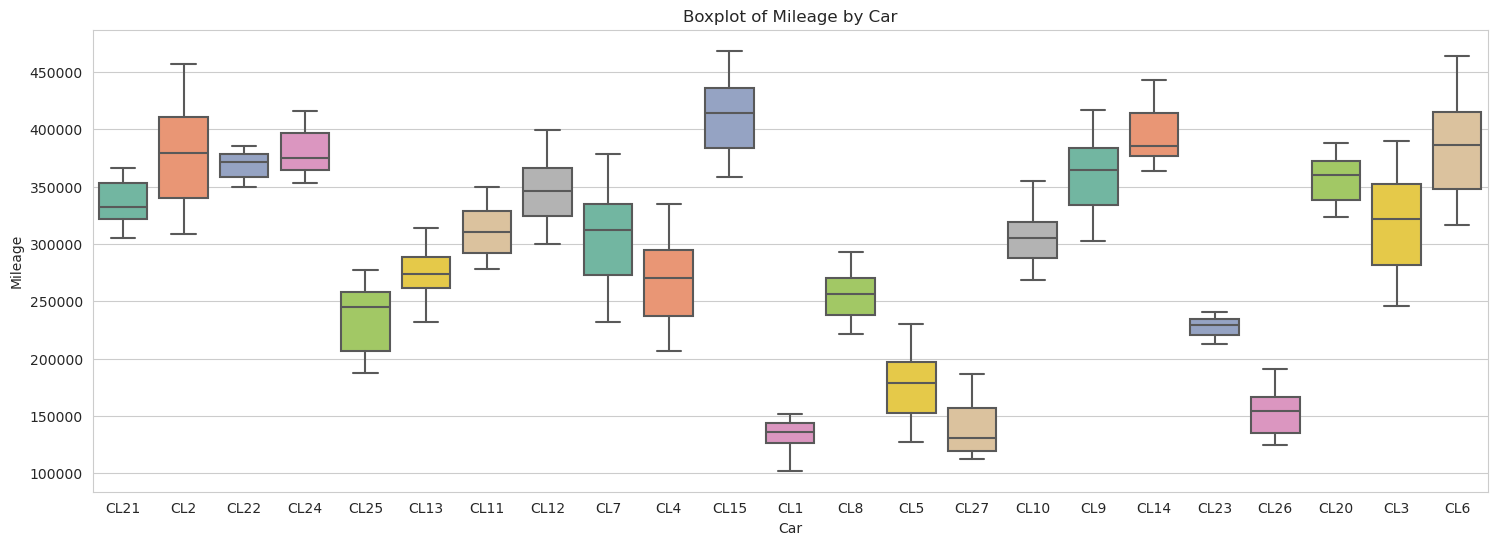

In [16]:
# 设置图像风格
sns.set_style("whitegrid")

# 创建一个新的图像
plt.figure(figsize=(18, 6))

# 绘制箱式图
sns.boxplot(data=energy_data, x="car", y="mileage", palette="Set2")

# 设置标题和标签
plt.title("Boxplot of Mileage by Car")
plt.xlabel("Car")
plt.ylabel("Mileage")

# 显示图像
plt.show()

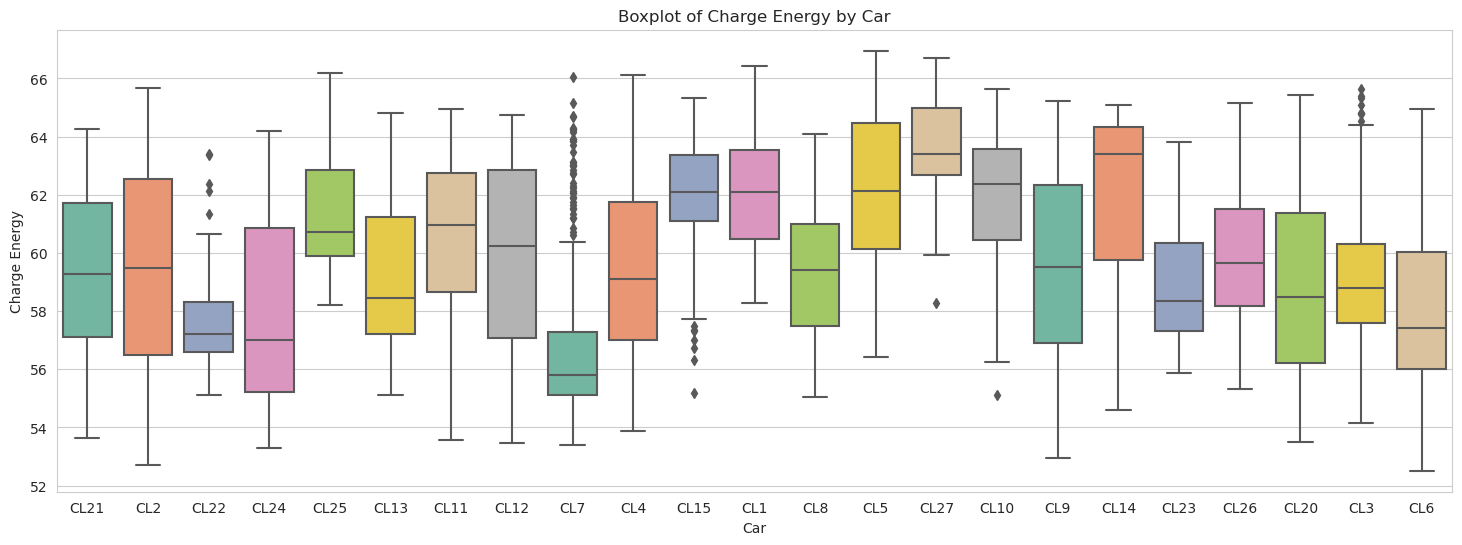

In [17]:
# 设置图像风格
sns.set_style("whitegrid")

# 创建一个新的图像
plt.figure(figsize=(18, 6))

# 绘制箱式图
sns.boxplot(data=energy_data, x="car", y="charge_energy", palette="Set2")

# 设置标题和标签
plt.title("Boxplot of Charge Energy by Car")
plt.xlabel("Car")
plt.ylabel("Charge Energy")

# 显示图像
plt.show()

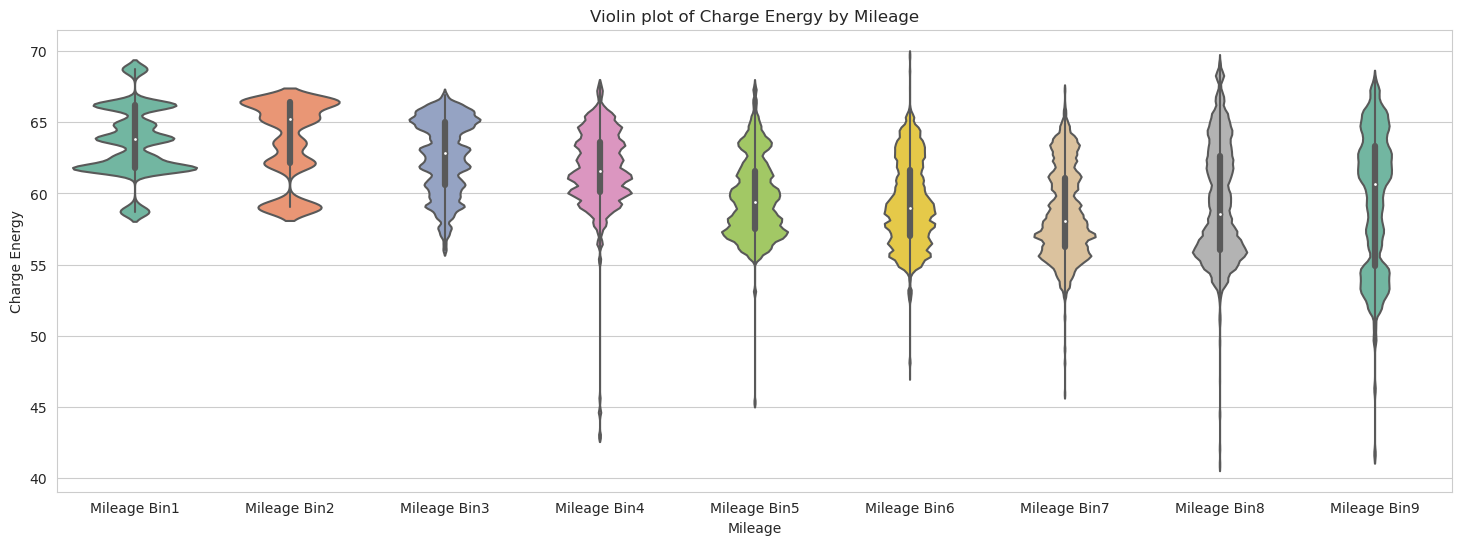

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# 设置图像风格
sns.set_style("whitegrid")

# 将里程划分为10个等级，并设置简洁的下标
bins = np.linspace(merged_df.mileage.min(), merged_df.mileage.max(), 10)
labels = [f'Mileage Bin{i}' for i in range(1, len(bins))]
merged_df['mileage_bins'] = pd.cut(merged_df.mileage, bins, labels=labels)

# 创建一个新的图像
plt.figure(figsize=(18, 6))

# 绘制小提琴图
sns.violinplot(data=merged_df, x="mileage_bins", y="charge_energy", palette="Set2")

# 设置标题和标签
plt.title("Violin plot of Charge Energy by Mileage")
plt.xlabel("Mileage")
plt.ylabel("Charge Energy")

# 显示图像
plt.show()

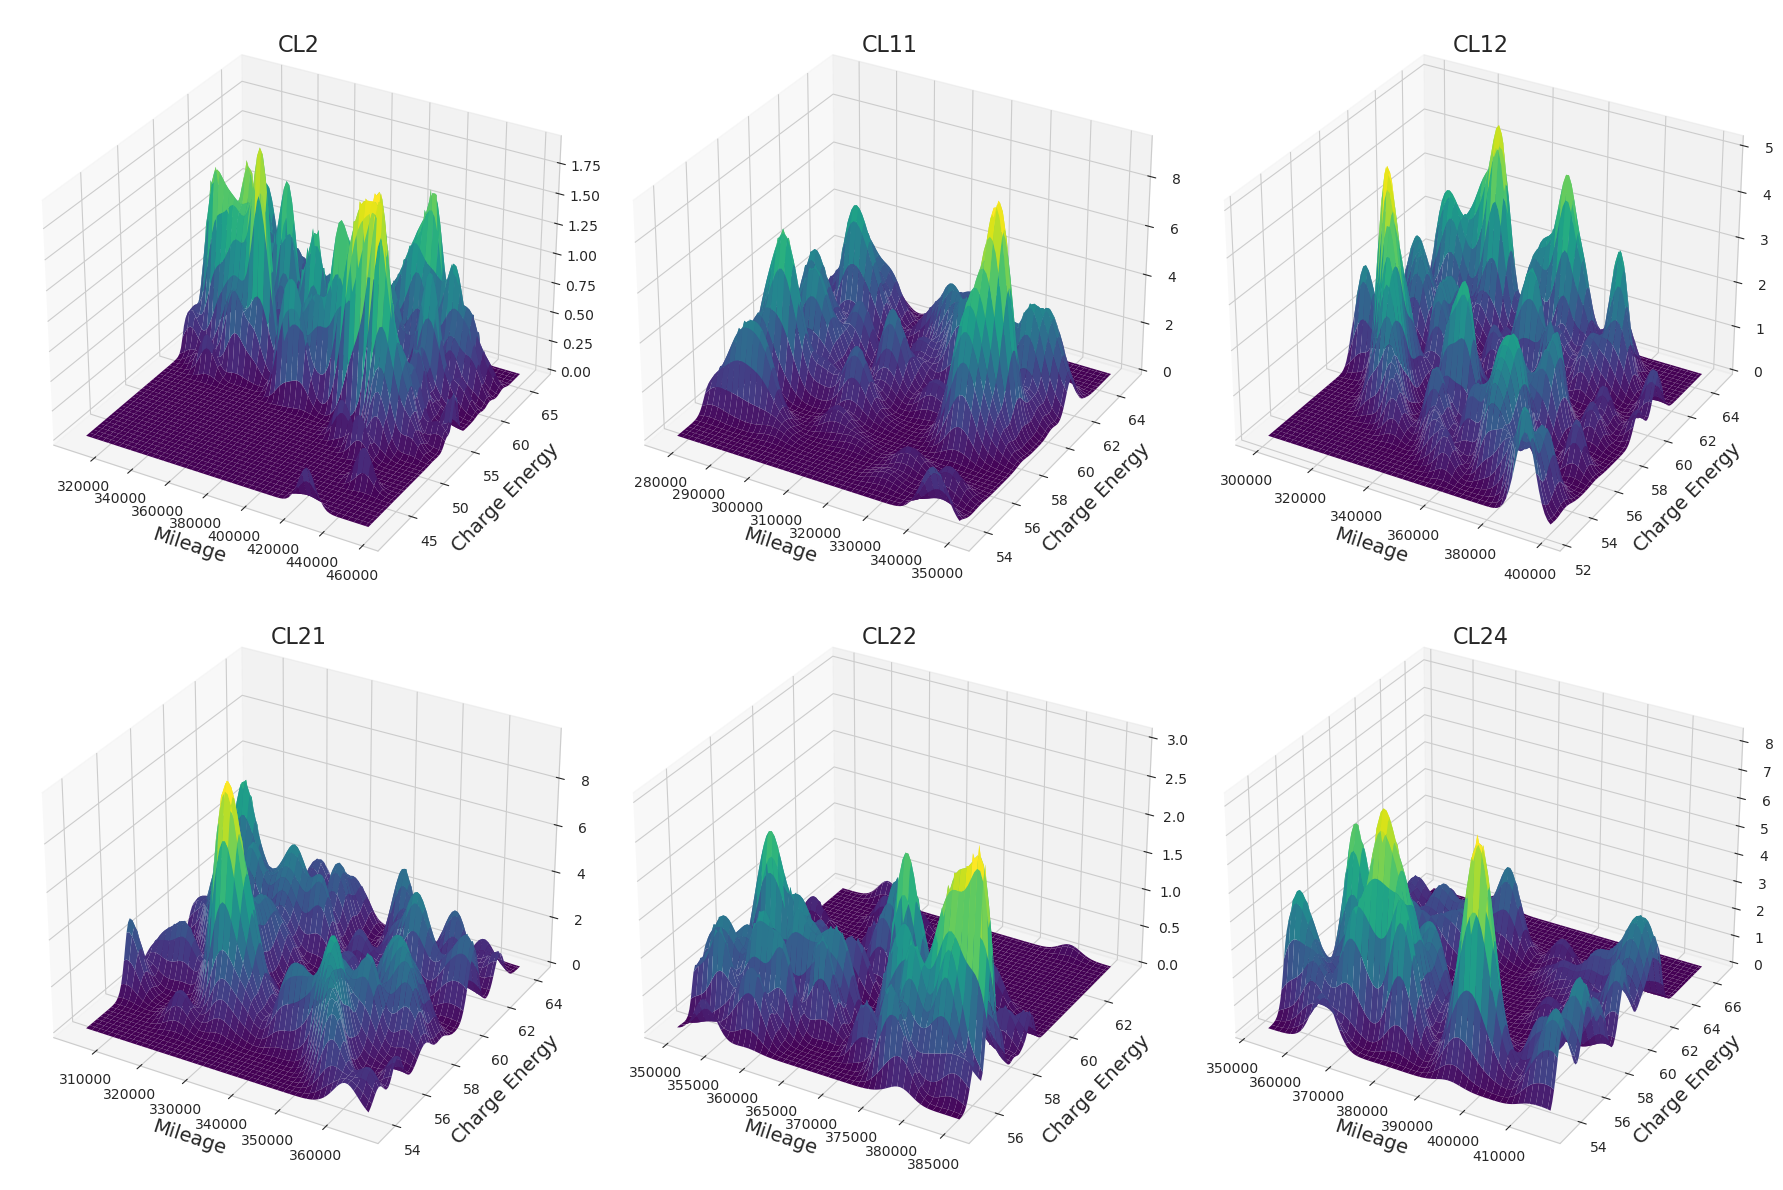

In [19]:
from scipy import stats

car_list = ['CL2','CL11','CL12','CL21','CL22','CL24']
fig = plt.figure(figsize=(18, 12))

for i, car in enumerate(car_list):
    car_data = merged_df[merged_df['car'] == car]
    ax = fig.add_subplot(2, 3, i+1, projection='3d')
    
    x = car_data['mileage']
    y = car_data['charge_energy']
    xmin, xmax = x.min(), x.max()
    ymin, ymax = y.min(), y.max()
    X, Y = np.mgrid[xmin:xmax:100j, ymin:ymax:100j]
    positions = np.vstack([X.ravel(), Y.ravel()])
    values = np.vstack([x, y])
    kernel = stats.gaussian_kde(values)
    Z = np.reshape(kernel(positions).T, X.shape)
    
    ax.plot_surface(X, Y, Z, cmap='viridis', edgecolor='none')
    ax.set_zlim(0, Z.max())
    
    ax.set_title(f"{car}", pad=-30,fontsize=16)
    ax.set_xlabel("Mileage",fontsize=14)
    ax.set_ylabel("Charge Energy",fontsize=14)

plt.subplots_adjust(wspace=-0.1, hspace=-0.1)
plt.tight_layout()
plt.show()